예약가능시간 : <br>
휴일: 10, 12, 14, 16, 18, 20시
<br>
업무일: 9, 12, 15, 18, 20시
<br>

강남3구 전체에서 하루 평균 (시간별 평균) (시간별표준편차): <br>
휴일 하루 예약 평균 120 (20, 20, 20, 20, 20) (4, 4, 4, 4, 4)<br>
업무일 하루 예약 평균 55 (5, 5, 5, 20, 20) (1, 1, 1, 4, 4)<br>
접속: 랜덤시간 <br>
접속 -> 예약 전환률 : 0.2 <br>

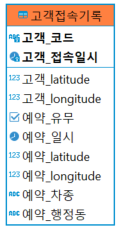

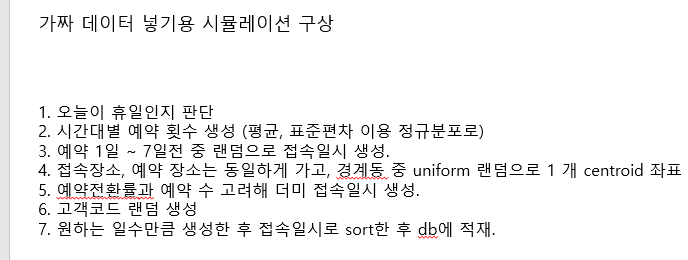

In [1]:
# import os
# os.path.dirname(__file__)

In [2]:
# sys.path.append(os.path.join(os.path.dirname(__file__), 'path_to_your_lib'))

In [3]:
# pip install pandas==2.2.2 pytimekr==0.1.0 geoalchemy2==0.15.1 scipy==1.13.1 geopandas==1.0.0 openpyxl==3.1.4 fitter==1.7.1 requests
# conda install psycopg2

In [4]:
from src.데이터생성 import 시뮬레이션_고객수요
import pandas as pd
import numpy as np
import geopandas as gpd
import pickle

In [5]:
import pickle

# load
with open('./data/강남3구_집계구_경계_중심.pickle', 'rb') as f:
    강남3구_집계구_경계_중심 = pickle.load(f)
강남3구_집계구_경계_중심.reset_index(drop = True, inplace = True)
강남3구_집계구_경계_중심

/tmp/ipykernel_3709656/1706404114.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  강남3구_집계구_경계_중심 = pickle.load(f)


,gu,TOT_REG_CD,geometry,count,centroid
0,11220,11220520010107,"POLYGON ((127.02654 37.48948, 127.02601 37.489...",53.0,POINT (127.02621 37.48978)
1,11220,11220590020102,"POLYGON ((127.00201 37.5079, 127.00223 37.5074...",54.0,POINT (127.00173 37.50763)
2,11220,11220670020002,"POLYGON ((127.03551 37.46515, 127.03539 37.464...",114.0,POINT (127.0478 37.44425)
3,11220,11220680030001,"POLYGON ((127.07618 37.45624, 127.07639 37.456...",116.0,POINT (127.06819 37.44481)
4,11220,11220540010106,"POLYGON ((127.02177 37.50081, 127.02166 37.500...",60.0,POINT (127.02117 37.50097)
...,...,...,...,...,...
2699,11240,11240540010801,"POLYGON ((127.14493 37.48965, 127.14463 37.488...",146.0,POINT (127.14401 37.48973)
2700,11240,11240590030105,"POLYGON ((127.14341 37.51721, 127.14356 37.517...",63.0,POINT (127.14088 37.51645)
2701,11240,11240590040102,"POLYGON ((127.13568 37.51516, 127.13544 37.514...",51.0,POINT (127.13466 37.51537)
2702,11240,11240820010202,"POLYGON ((127.14042 37.48346, 127.14018 37.482...",66.0,POINT (127.13148 37.47358)


In [6]:
접속_도착_텀 = pd.read_excel('./raw_data/요일별_연수_데이터3.xlsx')
접속_도착_텀['예약날짜'] = pd.to_datetime(접속_도착_텀['예약날짜'])
접속_도착_텀['학원도착날짜'] = pd.to_datetime(접속_도착_텀['학원도착날짜'])
접속_도착_텀['term'] = 접속_도착_텀['학원도착날짜'] - 접속_도착_텀['예약날짜']
data_term = 접속_도착_텀.sort_values('term').reset_index(drop=True)

samples = []
for i, tick in enumerate(data_term['term']):
    print(i, tick, tick.total_seconds())
    if i >= 51:
        samples.append(tick.total_seconds())

0 0 days 00:00:45 45.0
1 0 days 00:00:53 53.0
2 0 days 00:01:07 67.0
3 0 days 00:01:09 69.0
4 0 days 00:01:14 74.0
5 0 days 00:01:20 80.0
6 0 days 00:01:44 104.0
7 0 days 00:01:51 111.0
8 0 days 00:02:01 121.0
9 0 days 00:02:42 162.0
10 0 days 00:03:17 197.0
11 0 days 00:03:25 205.0
12 0 days 00:04:02 242.0
13 0 days 00:04:42 282.0
14 0 days 00:05:04 304.0
15 0 days 00:05:59 359.0
16 0 days 00:06:34 394.0
17 0 days 00:06:45 405.0
18 0 days 00:07:37 457.0
19 0 days 00:09:31 571.0
20 0 days 00:10:05 605.0
21 0 days 00:10:17 617.0
22 0 days 00:12:06 726.0
23 0 days 00:12:07 727.0
24 0 days 00:12:26 746.0
25 0 days 00:13:17 797.0
26 0 days 00:14:41 881.0
27 0 days 00:15:14 914.0
28 0 days 00:15:46 946.0
29 0 days 00:17:33 1053.0
30 0 days 00:21:00 1260.0
31 0 days 00:26:13 1573.0
32 0 days 00:26:48 1608.0
33 0 days 00:27:59 1679.0
34 0 days 00:28:00 1680.0
35 0 days 00:29:29 1769.0
36 0 days 00:35:00 2100.0
37 0 days 00:40:04 2404.0
38 0 days 00:51:51 3111.0
39 0 days 00:55:58 3358.0
40 0 

In [7]:
from fitter import Fitter
핏터 = Fitter(samples)
핏터.fit()


/home/yspark/miniconda3/envs/test_make_data_3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3863: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/home/yspark/miniconda3/envs/test_make_data_3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3863: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intgrl = integrate.quad(llc, x0, x1,
/home/yspark/miniconda3/envs/test_make_data_3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3858: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intgrl = (integrate.quad(llc, x0, mean,
/home/yspark/miniconda3/envs/test_make_data_3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3860: IntegrationWar

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgamma,2.539978e-10,3041.701672,-833.987182,inf,0.064044,0.997916
fisk,2.549088e-10,3031.023744,-833.869036,inf,0.071459,0.991497
alpha,2.570409e-10,3034.855475,-833.594166,inf,0.070456,0.992789
geninvgauss,2.580934e-10,3018.536932,-829.962803,inf,0.080441,0.971554
gibrat,2.590061e-10,3082.861742,-836.839322,inf,0.089667,0.931944


/home/yspark/miniconda3/envs/test_make_data_3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/yspark/miniconda3/envs/test_make_data_3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/yspark/miniconda3/envs/test_make_data_3/lib/python3.9/site-packages/scipy/integrate/_quadpack

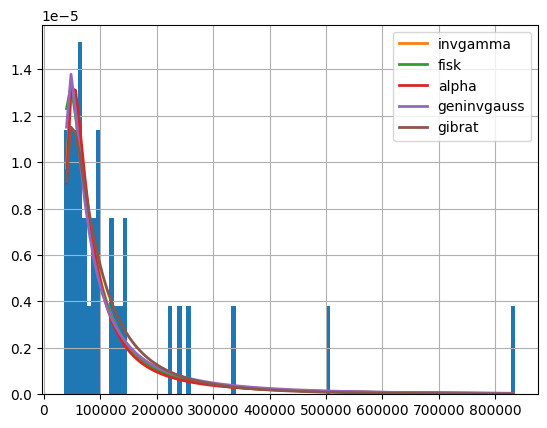

In [8]:
핏터.summary()

In [9]:
db_info = {
    'ip': '163.152.172.163',
    'port':'5432',
    'username': 'tgsociety',
    'password': 'tgsociety',
    'dbname': 'postgres'
}

In [11]:
from src.db_io import Engine
import os
from datetime import datetime, timedelta

시군구_ids = [['11220', '11230', '11240'],
          ['11010', '11020', '11030', '11040', '11050', '11060'],
          ['11070', '11080', '11090', '11100', '11110'],
          ['11120', '11130', '11140', '11150'],
          ['11160', '11170', '11180', '11250'],
          ['11190', '11200', '11210']]
시군구_ids.pop(0)
db_handler = Engine(db_info)
for 시군구 in 시군구_ids:
    query = f"""
    SELECT 시군구_id, 집계구_id, 수요인구, 중심
    FROM datamart.관리_info_집계구_뷰
    WHERE 시군구_id IN ({', '.join(f"'{id}'" for id in 시군구)})
    """
    # 쿼리 실행 및 GeoDataFrame으로 변환
    강남3구_집계구_경계_중심 = gpd.read_postgis(query, db_handler.engine, geom_col='중심')
    # 시작일 설정
    start_date = datetime.strptime('2023-08-01 01:00:00', '%Y-%m-%d %H:%M:%S')
    
    # 총일수 설정
    # total_days = 1  # 예시로 10일을 사용, 필요에 맞게 변경하세요
    # for i in range(total_days):
    # current_date = start_date + timedelta(days=i)
    current_date = start_date
    current_date_str = current_date.strftime('%Y-%m-%d %H:%M:%S')
    simul = 시뮬레이션_고객수요(db_info = db_info, 시작일 = current_date_str, 위치_데이터 = 강남3구_집계구_경계_중심, 총일수 = 359,
                      term_samples = samples, term_generate_method = 'invgamma')
    simul.데이터생성시뮬실행()

False
[3, 3, 8, 7, 6, 9, 6, 4, 1, 4, 8, 6, 4]
False
[1, 1, 8, 6, 7, 4, 3, 6, 5, 13, 12, 12, 2]
False
[3, 3, 11, 9, 4, 5, 3, 8, 3, 16, 11, 8, 2]
False
[4, 6, 4, 5, 4, 6, 7, 5, 8, 9, 8, 5, 9]
True
[4, 2, 5, 8, 2, 8, 4, 6, 6, 5, 7, 4, 6]
True
[2, 3, 9, 3, 7, 5, 4, 5, 6, 9, 11, 6, 5]
False
[1, 2, 6, 4, 5, 6, 8, 4, 3, 14, 10, 8, 7]
False
[0, 2, 9, 4, 8, 6, 9, 6, 6, 9, 8, 8, 2]
False
[3, 3, 10, 4, 3, 4, 3, 3, 7, 9, 9, 9, 2]
False
[4, 5, 4, 2, 11, 8, 6, 13, 5, 9, 13, 7, 6]
False
[3, 2, 7, 3, 7, 11, 4, 5, 13, 9, 9, 7, 7]
True
[3, 2, 6, 2, 10, 6, 7, 7, 5, 9, 8, 4, 11]
True
[3, 3, 4, 4, 5, 4, 6, 3, 6, 11, 11, 10, 4]
False
[4, 3, 5, 5, 3, 6, 8, 7, 4, 8, 15, 6, 8]
True
[3, 7, 5, 6, 5, 7, 10, 6, 4, 9, 8, 4, 4]
False
[3, 2, 7, 7, 5, 8, 4, 6, 4, 9, 14, 8, 10]
False
[3, 2, 6, 9, 7, 3, 6, 4, 5, 11, 8, 8, 7]
False
[5, 2, 11, 4, 4, 8, 8, 4, 5, 12, 8, 9, 8]
True
[1, 1, 4, 8, 5, 7, 6, 8, 5, 14, 18, 11, 8]
True
[5, 2, 8, 6, 6, 7, 5, 7, 5, 11, 16, 11, 7]
False
[3, 2, 6, 3, 1, 5, 4, 2, 6, 11, 3, 10, 5]
False


In [ ]:

asdghg


In [ ]:
from datetime import datetime, timedelta

# 시작일 설정
start_date = datetime.strptime('2024-07-23 01:00:00', '%Y-%m-%d %H:%M:%S')

# 총일수 설정
# total_days = 1  # 예시로 10일을 사용, 필요에 맞게 변경하세요
# for i in range(total_days):
# current_date = start_date + timedelta(days=i)
current_date = start_date
current_date_str = current_date.strftime('%Y-%m-%d %H:%M:%S')
simul = 시뮬레이션_고객수요(db_info = db_info, 시작일 = current_date_str, 위치_데이터 = 강남3구_집계구_경계_중심, 총일수 = 1,
                  term_samples = samples, term_generate_method = 'invgamma')
simul.데이터생성시뮬실행()

In [ ]:
# import numpy as np
# from scipy.stats import anderson

# # 샘플 크기 설정
# sample_sizes = [20, 50, 100, 200]

# # 정규 분포에서 데이터 생성 및 AD 검정 수행
# for size in sample_sizes:
#     data = np.random.normal(0, 1, size)
#     result = anderson(data, dist='norm')
    
#     print(f"Sample Size: {size}")
#     print(f"Test Statistic: {result.statistic}")
#     print(f"Critical Values: {result.critical_values}")
#     print(f"Significance Levels: {result.significance_level}")
    
#     # 각 유의수준에 대한 결과 해석
#     for sig_level, critical_value in zip(result.significance_level, result.critical_values):
#         if result.statistic > critical_value:
#             print(f"At the {sig_level}% significance level, the null hypothesis is rejected.")
#         else:
#             print(f"At the {sig_level}% significance level, the null hypothesis cannot be rejected.")
#     print()